# Change Point Methods Comparison

Compare different change point detection methods and their outputs.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
from src.change_point_model import ChangePointModel

PELT: 1 change points
BINSEG: 1 change points
WINDOW: 162 change points


C:\Users\W-HP\AppData\Local\Temp\ipykernel_2628\358910112.py:44: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


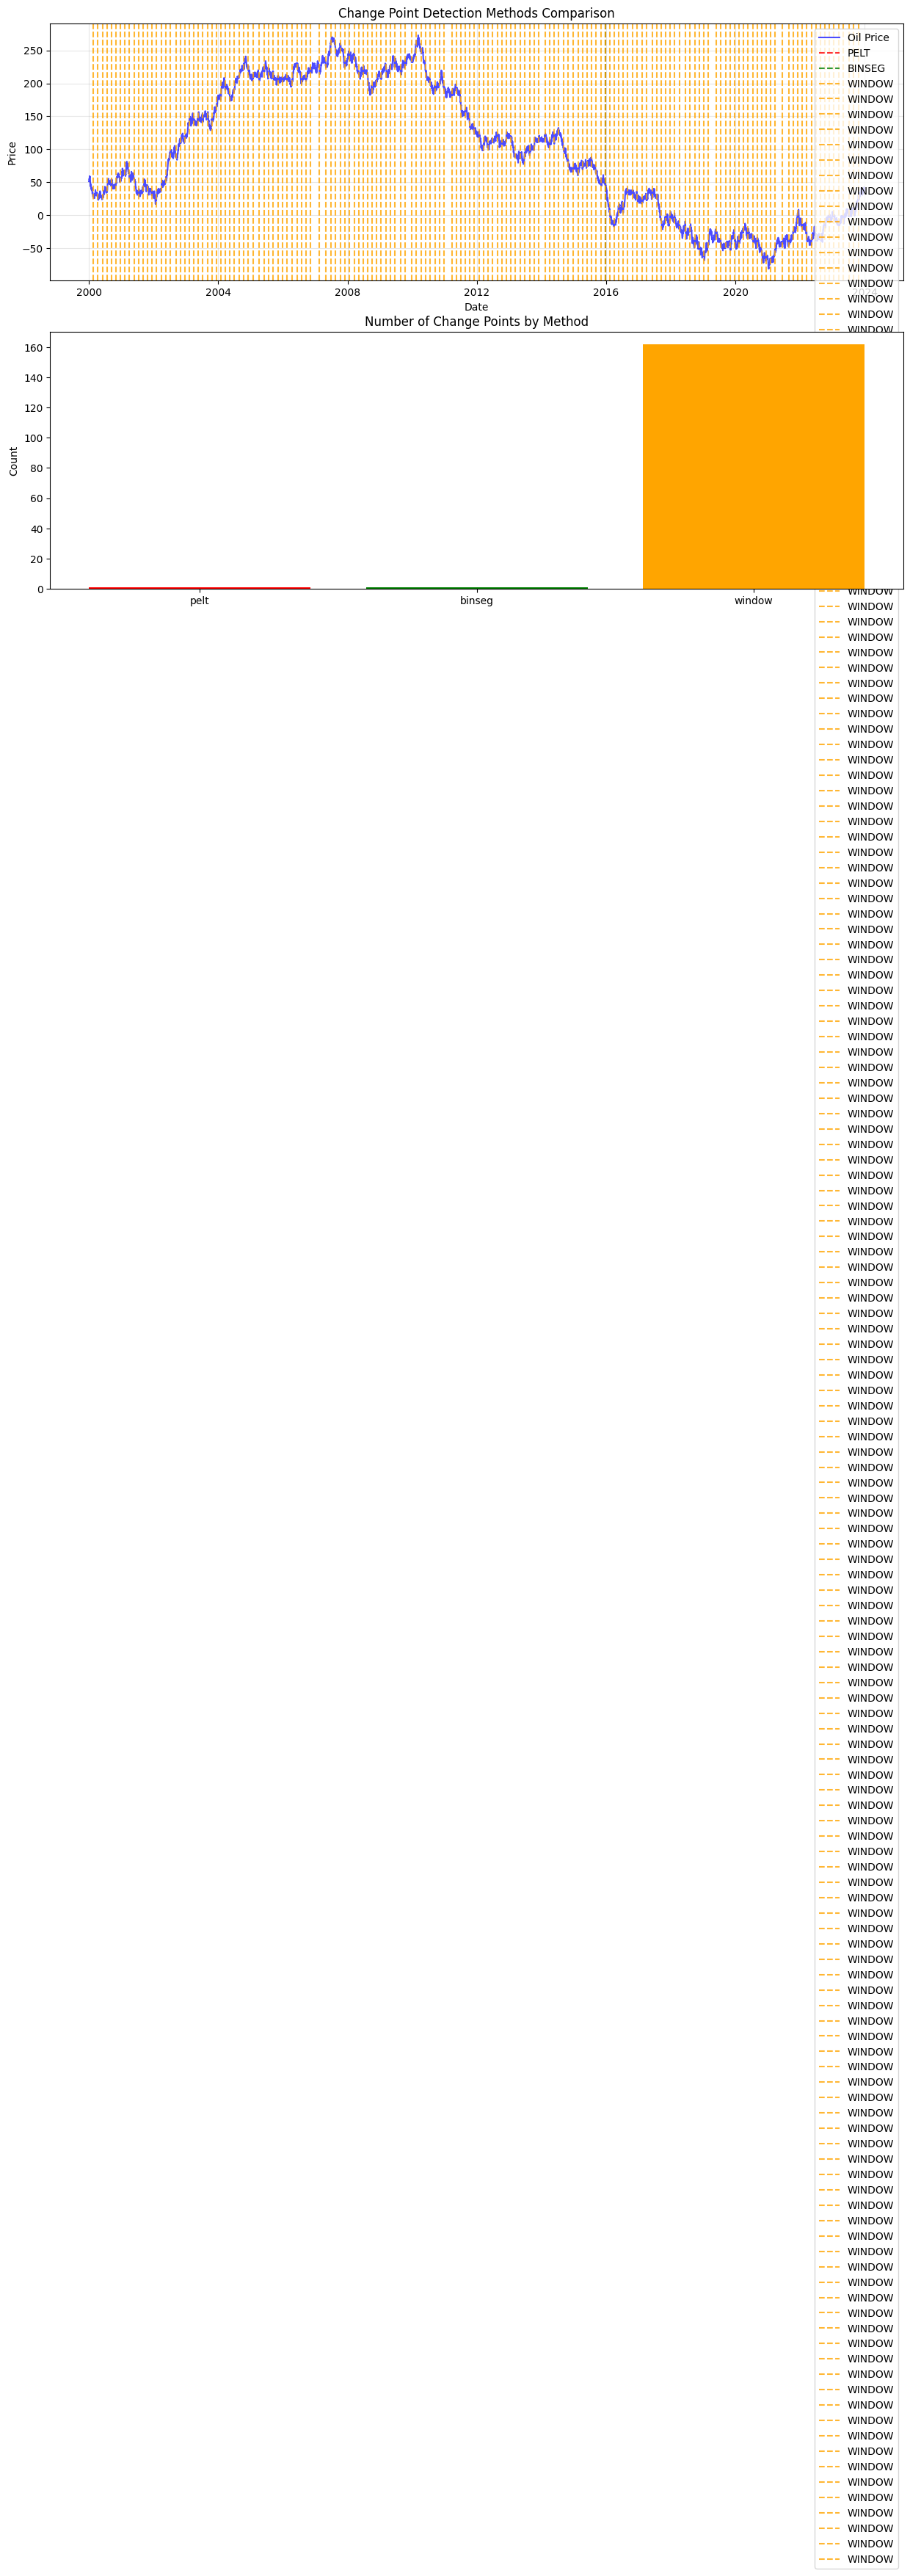

In [2]:
# Create synthetic data
np.random.seed(42)
dates = pd.date_range('2000-01-01', '2023-12-31', freq='D')
prices = 50 + np.random.randn(len(dates)).cumsum() * 2
oil_data = pd.DataFrame({'date': dates, 'price': prices})

# Compare methods
methods = ['pelt', 'binseg', 'window']
results = {}

for method in methods:
    try:
        model = ChangePointModel(oil_data, method=method)
        result = model.detect_change_points(penalty=10.0)
        results[method] = result
        print(f"{method.upper()}: {len(result.get('change_points', []))} change points")
    except Exception as e:
        print(f"{method} failed: {e}")

# Plot comparison
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(oil_data['date'], oil_data['price'], 'b-', alpha=0.7, label='Oil Price')

colors = {'pelt': 'red', 'binseg': 'green', 'window': 'orange'}
for method, result in results.items():
    if 'change_dates' in result:
        for date in result['change_dates']:
            plt.axvline(x=date, color=colors[method], 
                       linestyle='--', alpha=0.8, label=f'{method.upper()}')

plt.title('Change Point Detection Methods Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
method_counts = [len(results[m].get('change_points', [])) for m in methods]
plt.bar(methods, method_counts, color=[colors[m] for m in methods])
plt.title('Number of Change Points by Method')
plt.ylabel('Count')

plt.tight_layout()
plt.show()